# Portfolio - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

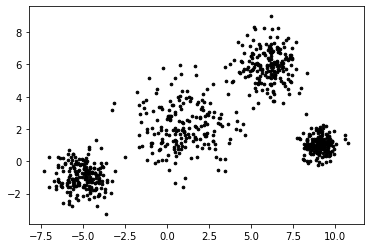

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

In [3]:
print(data.shape)
data

(800, 2)


array([[ 1.66184123,  1.50369477],
       [ 4.64615678,  1.62186181],
       [ 1.16441476,  4.37372168],
       ...,
       [-5.94762563,  0.05925507],
       [-5.5282781 , -0.16683908],
       [-5.02162618, -0.15647292]])

# Interpretation

This is used to print the `shape` of the data (data is in `2 dimensions`)
Also, we are checking what values are stored in `data` after generating random data for the purpose of `plotting four centers`

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [4]:
k=4
mean=data.mean()
print ("The mean for the normalised data is:",mean)
std=np.std(data)
print ("The standard deviation for the normalised data is:",std)

The mean for the normalised data is: 2.3897478180960845
The standard deviation for the normalised data is: 4.319440166126304


# Interpretation

Setting the number of `clusters i.e. k to 4` and printing the `mean` and `std deviation`.

In [5]:
np.random.seed(6)
centres = np.random.randn(k,2)*std + mean
print(centres)

[[ 1.0430169   5.53863665]
 [ 3.33061168 -1.4938254 ]
 [-8.35175241  6.33448312]
 [ 7.25803215 -4.15028729]]


# Interpretation

Setting the `random seed to 6` and generating ` 4 initial random centres`
The variable `centres` is storing the values of the four centroids in an array

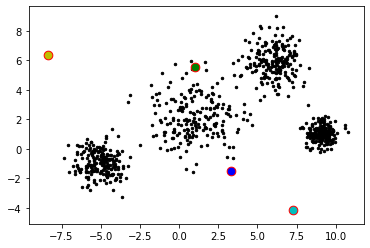

In [6]:
def visualize():
    plt.scatter(data[:,0], data[:,1], s=6, c='k')
    color_code=['g','b','y','c']
    for i in range(4):
        color=color_code[i]
        plt.scatter(centres[i][0],centres[i][1],marker='.', s=300, c=color,edgecolor='r')
visualize()

# Interpretation

A function `visualize` has been defined to plot the centroids on data randomly with color code as `g,b,y,c` and edgecolor has been set  to`red`
This `for loop` is `iterating four times` to allot 4 centres to the data.

## 2. Visualise the clustering results in each iteration

`KMeans Clustering Algorithm basic explanation:`

KMeans Clustering Algorithm is an unsupervised learning algorithm and it works by finding a fixed number of clusters in a particular set of data.

#### Below are the steps to implement a KMeans Clustering Algorithm:####

1. Start with K randomly placed cluster centroids
2. For each data point, assign it to the closest cluster centroid
3. Re-estimate the cluster centroids for each cluster based on the data points that belong to it
4. If the centroid estimate has not changed significantly, terminate the process, otherwise repeat from step 2.

In [7]:
clusters=np.zeros(len(data))
clusters.shape

(800,)

# Interpretation

A one dimensional array is created with size 800 for the cluster centres for all the four data points (`data_1,data_2,data_3,data_4`)

In [8]:
def eucledian_distance(point, centroid, ax=1):
    return np.linalg.norm(point - centroid, axis=ax) 

# Interpretation

A function named `eucledian_distance` has been defined to calculate the distance between individual points and the previous centres ####
`Euclidean distance` between two data points is calculated via `pythagora's theorem`

In [9]:
def cluster_find():
    for i in range(len(data)):    
        distances = eucledian_distance(data[i],centres)
        cluster = np.argmin(distances)
        clusters[i] = cluster

# Interpretation

A function named `cluster_find` has been defined to find the nearest cluster to assign a respective centroid to that cluster.

In [10]:
def centres_find():
    for d in range(k):
        pts=[data[j] for j in range(len(data)) if clusters[j]==d]
        centres[d]=np.mean(pts,axis=0)

# Interpretation

A function named `centres_find` has been defined to find the new centres using the averages of the points which belong to the same cluster ####

In [11]:
cluster_find()
print(clusters)

[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Interpretation

Calling the function `cluster_find`  and printing the clusters

In [12]:
centres_find()
centres

array([[ 3.99620775,  4.82013001],
       [-1.08109426, -0.14715591],
       [-5.54024032, -0.68960389],
       [ 9.09422694,  1.02197195]])

# Interpretation

Calling the function `centres_find` and printing the new centres in form of an array.

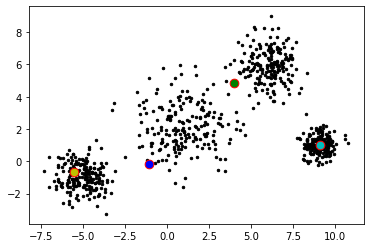

In [13]:
visualize()

# Interpretation

Calling the function `visualize` to plot the new centres.

In [14]:
cluster_find()
centres_find()

centres

array([[ 4.90132371,  5.15030358],
       [ 0.24633035,  1.5433697 ],
       [-5.0796739 , -0.95753889],
       [ 9.05236058,  1.0794625 ]])

# Interpretation

Calling all the required functions again and printing the new centres in an array

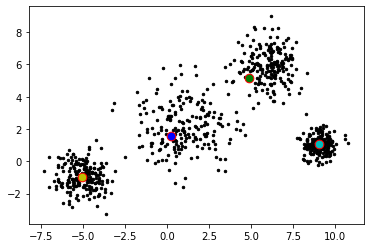

In [15]:
visualize()

# Interpretation

Plotting the new centres again by calling the visualize function

In [16]:
cluster_find()
centres_find()

centres

array([[ 5.76438788,  5.71757292],
       [ 0.77137496,  2.03200622],
       [-5.05717014, -0.94967031],
       [ 9.063639  ,  1.04633907]])

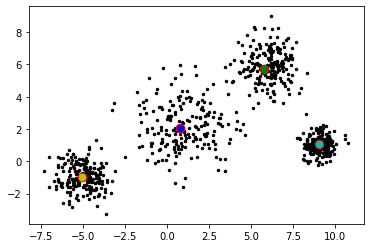

In [17]:
visualize()

In [18]:
cluster_find()
centres_find()
centres

array([[ 5.97243759,  5.88784838],
       [ 0.93973117,  2.13879788],
       [-5.05717014, -0.94967031],
       [ 9.063639  ,  1.04633907]])

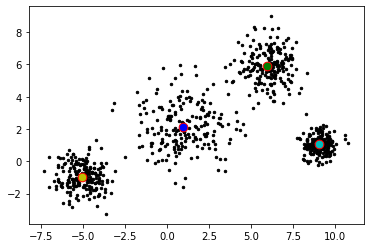

In [19]:
visualize()

In [20]:
cluster_find()
centres_find()
centres

array([[ 6.0053298 ,  5.92528865],
       [ 0.98297825,  2.15787959],
       [-5.05717014, -0.94967031],
       [ 9.063639  ,  1.04633907]])

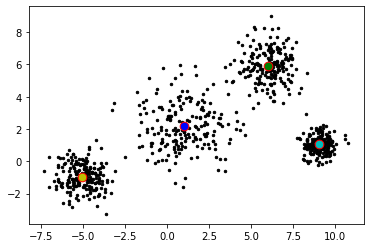

In [21]:
visualize()

# Conclusion #

`As we can see that there are not any significant changes in the 5th iteration in the centroids plotting on each cluster, so we can terminate the process of centroid updation with the above plot as the final result.`